<a href="https://colab.research.google.com/github/Saumyadip/Timeseries-Analysis/blob/main/Timeseries_Analysis_using_ARIMA_%2B_Holt_Winters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing necessary libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from google.colab import data_table
data_table.enable_dataframe_formatter()

In [ ]:
# reading from the file stored in Google drive

df=pd.read_excel('/content/drive/MyDrive/Capstone/TS Data/TS Data.xlsx')

In [ ]:
df.head()

,Month,Attrition
0,2021-04-01,56
1,2021-05-01,99
2,2021-06-01,87
3,2021-07-01,100
4,2021-08-01,106


In [ ]:
# Converting the Month column to DateTime column

df['Month']=pd.to_datetime(df['Month'])

In [ ]:
df.head()

,Month,Attrition
0,2021-04-01,56
1,2021-05-01,99
2,2021-06-01,87
3,2021-07-01,100
4,2021-08-01,106


In [ ]:
# Setting month as index column. This is required for Timeseries Modeling

df.set_index('Month',inplace=True)

In [ ]:
df.head()

,Attrition
Month,
2021-04-01,56
2021-05-01,99
2021-06-01,87
2021-07-01,100
2021-08-01,106


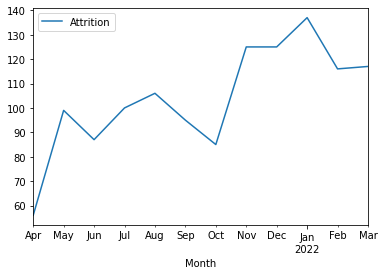

In [ ]:
# Checking the trend

df.plot()

In [ ]:
# Testing For Stationarity using Dickey-Fuller Test

from statsmodels.tsa.stattools import adfuller

In [ ]:
test_result=adfuller(df['Attrition'])

In [ ]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(attr):
    result=adfuller(attr)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [ ]:
# Dickey-Fuller Test on Attrition numbers

adfuller_test(df['Attrition'])

ADF Test Statistic : -2.9531683637134165
p-value : 0.039505415853632445
#Lags Used : 0
Number of Observations Used : 11
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [ ]:
# Taking the difference shifitng by one month

df['Attr 1 Difference'] = df['Attrition'] - df['Attrition'].shift(1)

In [ ]:
df['Attrition'].shift(1)

Month
2021-04-01      NaN
2021-05-01     56.0
2021-06-01     99.0
2021-07-01     87.0
2021-08-01    100.0
2021-09-01    106.0
2021-10-01     95.0
2021-11-01     85.0
2021-12-01    125.0
2022-01-01    125.0
2022-02-01    137.0
2022-03-01    116.0
Name: Attrition, dtype: float64

In [ ]:
# Taking the difference shifitng by 3 months

df['Seasonal First Difference']=df['Attrition']-df['Attrition'].shift(3)

In [ ]:
df.head(12)

,Attrition,Attr 1 Difference,Seasonal First Difference
Month,,,
2021-04-01,56,NaN,NaN
2021-05-01,99,43.0,NaN
2021-06-01,87,-12.0,NaN
2021-07-01,100,13.0,44.0
2021-08-01,106,6.0,7.0
2021-09-01,95,-11.0,8.0
2021-10-01,85,-10.0,-15.0
2021-11-01,125,40.0,19.0
2021-12-01,125,0.0,30.0


In [ ]:
# Again dickey fuller test to see if the data is stationary
 
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -6.912355729194308
p-value : 1.2033353100590796e-09
#Lags Used : 2
Number of Observations Used : 6
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


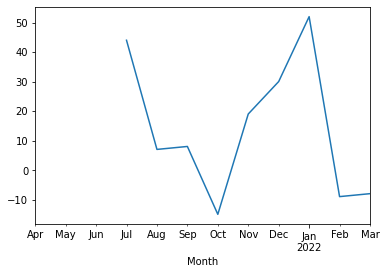

In [ ]:
df['Seasonal First Difference'].plot()

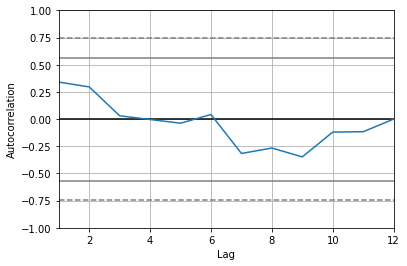

In [ ]:
# importing libraries to check auto-correlation

from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Attrition'])
plt.show()

In [ ]:
# For non-seasonal data

from statsmodels.tsa.arima.model import ARIMA

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

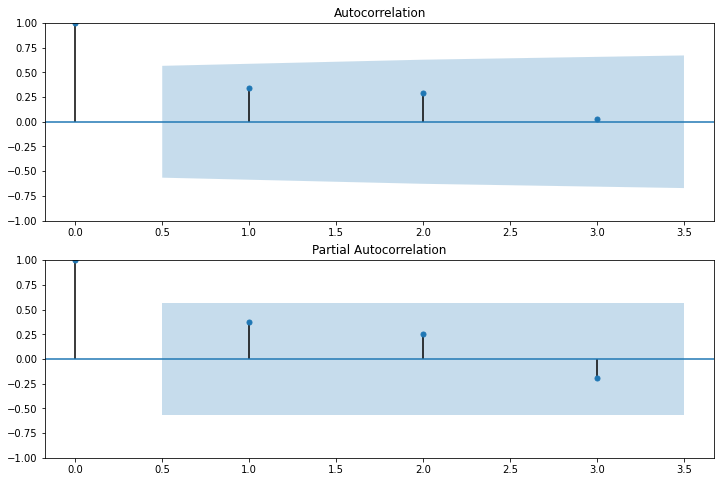

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Attrition'],lags=3,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Attrition'],lags=3,ax=ax2)

In [ ]:
# installing pmdarima for auto-arima

!pip install pmdarima


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# identifying the best ARIMA order for p,d,q

from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")
sf = auto_arima(df['Attrition'], trace = True, supress_warning = True )

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=111.285, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=110.725, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=111.914, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=148.006, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=112.239, Time=0.11 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=112.432, Time=0.18 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=113.409, Time=0.04 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 1.025 seconds


In [ ]:
# ARIMA Model creation

model=ARIMA(df['Attrition'],order=(1,0,0))
model_fit=model.fit()

In [ ]:
# ARIMA Model summary

model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Attrition   No. Observations:                   12
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 -52.363
Date:                Wed, 24 Aug 2022   AIC                            110.725
Time:                        10:54:46   BIC                            112.180
Sample:                    04-01-2021   HQIC                           110.187
                         - 03-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        101.0481     11.663      8.664      0.000      78.190     123.906
ar.L1          0.5491      0.283      1.942      0.052      -0.005       1.103
sigma2       350.5038    171.181      2.048      0.041      14.996     686.012
===================================================================================
Ljung-Box (L1) (Q):                   1.45   Jarque-Bera (JB):                 0.35
Prob(Q):                              0.23   Prob(JB):                         0.84
Heteroskedasticity (H):               0.34   Skew:                            -0.40
Prob(H) (two-sided):                  0.32   Kurtosis:                         2.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Month
2021-04-01           NaN
2021-05-01     76.313992
2021-06-01     87.467596
2021-07-01     93.591597
2021-08-01     96.954042
2021-09-01     98.800227
2021-10-01     99.813893
2021-11-01    100.370457
2021-12-01    100.676044
2022-01-01    100.843830
2022-02-01    100.935955
2022-03-01    100.986536
Name: forecast, dtype: float64

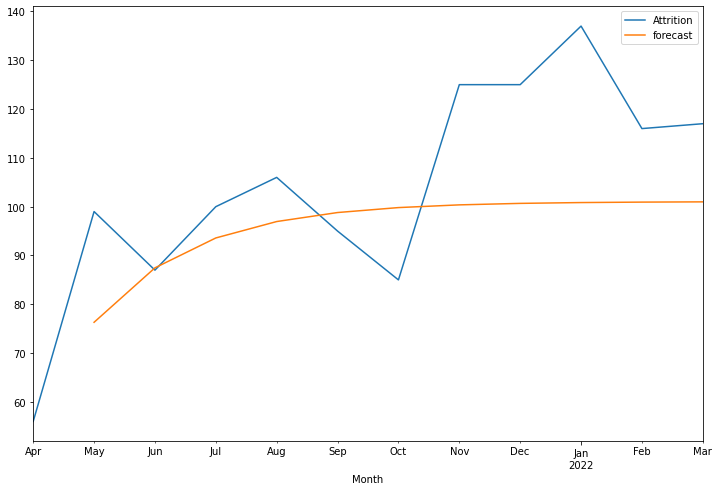

In [ ]:
# prediction using ARIMA model

df['forecast']=model_fit.predict(start=1,end=15,dynamic=True)
df[['Attrition','forecast']].plot(figsize=(12,8))

df['forecast']

In [ ]:
# Creating a Seasonal ARIMA to verify if seasonality is present which might not have been identified during Diceky-Fuller test

import statsmodels.api as sm

model=sm.tsa.statespace.SARIMAX(df['Attrition'],order=(1, 0, 0),seasonal_order=(0,1,1,2))
results=model.fit()

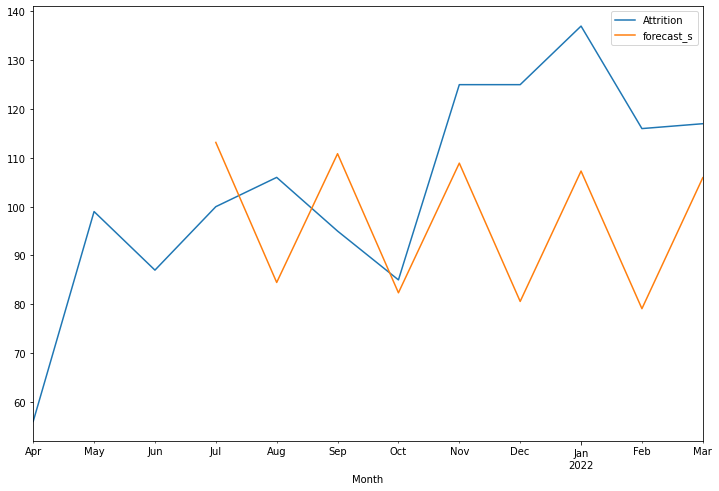

In [ ]:
# SARIMAX forecasted result

df['forecast_s']=results.predict(start=3,end=18,dynamic=True)
df[['Attrition','forecast_s']].plot(figsize=(12,8))

In [ ]:
# future predcition

from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,6)]

In [ ]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [ ]:
future_datest_df.tail()

,Attrition,Attr 1 Difference,Seasonal First Difference,forecast,forecast_s
2022-04-01,NaN,NaN,NaN,NaN,NaN
2022-05-01,NaN,NaN,NaN,NaN,NaN
2022-06-01,NaN,NaN,NaN,NaN,NaN
2022-07-01,NaN,NaN,NaN,NaN,NaN
2022-08-01,NaN,NaN,NaN,NaN,NaN


In [ ]:
future_df=pd.concat([df,future_datest_df])

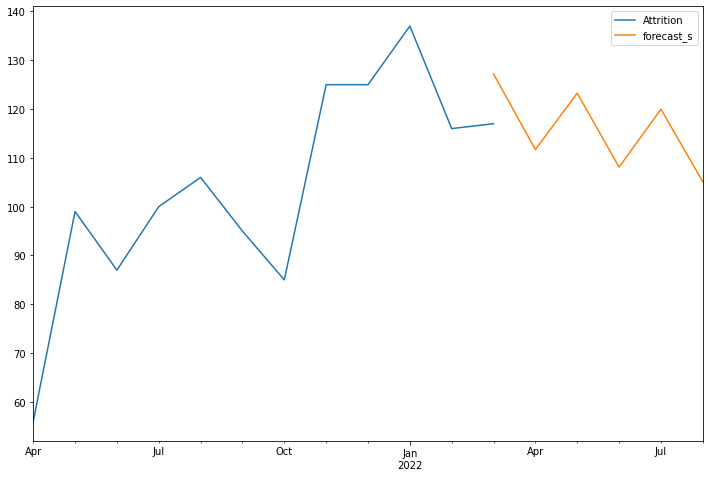

In [ ]:
# future prediction trend

future_df['forecast_s'] = results.predict(start=11,end=18,dynamic=True) 
future_df[['Attrition', 'forecast_s']].plot(figsize=(12, 8)) 

In [ ]:
future_df.tail()

,Attrition,Attr 1 Difference,Seasonal First Difference,forecast,forecast_s
2022-04-01,NaN,NaN,NaN,NaN,111.704458
2022-05-01,NaN,NaN,NaN,NaN,123.256777
2022-06-01,NaN,NaN,NaN,NaN,108.108801
2022-07-01,NaN,NaN,NaN,NaN,119.967061
2022-08-01,NaN,NaN,NaN,NaN,105.098994


In [ ]:
future_df

,Attrition,Attr 1 Difference,Seasonal First Difference,forecast,forecast_s
2021-04-01,56,NaN,NaN,NaN,NaN
2021-05-01,99,43.0,NaN,76.313992,NaN
2021-06-01,87,-12.0,NaN,87.467596,NaN
2021-07-01,100,13.0,44.0,93.591597,NaN
2021-08-01,106,6.0,7.0,96.954042,NaN
2021-09-01,95,-11.0,8.0,98.800227,NaN
2021-10-01,85,-10.0,-15.0,99.813893,NaN
2021-11-01,125,40.0,19.0,100.370457,NaN
2021-12-01,125,0.0,30.0,100.676044,NaN
2022-01-01,137,12.0,52.0,100.843830,NaN


In [ ]:
# time series - statsmodels 
# Seasonality decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose 

In [ ]:
# holt winters 
# single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing  

In [ ]:
# double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
m = 3
alpha = 1/(2*m)

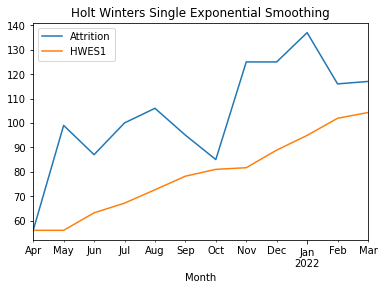

In [ ]:
#Single HWES
df['HWES1'] = SimpleExpSmoothing(df['Attrition']).fit(smoothing_level=alpha,optimized=False,use_brute=True).fittedvalues
df[['Attrition','HWES1']].plot(title='Holt Winters Single Exponential Smoothing')

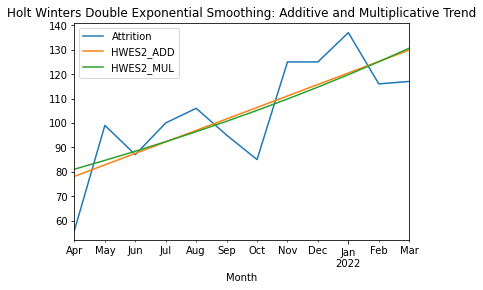

In [ ]:
#Double HWES
df['HWES2_ADD'] = ExponentialSmoothing(df['Attrition'],trend='add').fit().fittedvalues

df['HWES2_MUL'] = ExponentialSmoothing(df['Attrition'],trend='mul').fit().fittedvalues

df[['Attrition','HWES2_ADD','HWES2_MUL']].plot(title='Holt Winters Double Exponential Smoothing: Additive and Multiplicative Trend')

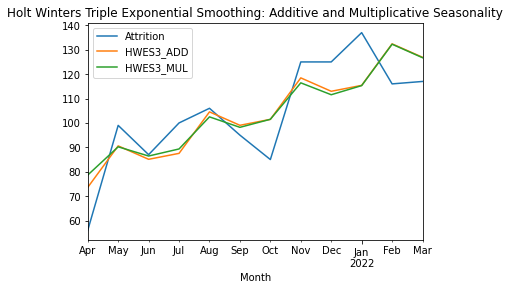

In [ ]:
#Triple HWES
df['HWES3_ADD'] = ExponentialSmoothing(df['Attrition'],trend='add',seasonal='add',seasonal_periods=3).fit().fittedvalues

df['HWES3_MUL'] = ExponentialSmoothing(df['Attrition'],trend='mul',seasonal='mul',seasonal_periods=3).fit().fittedvalues

df[['Attrition','HWES3_ADD','HWES3_MUL']].plot(title='Holt Winters Triple Exponential Smoothing: Additive and Multiplicative Seasonality')

In [ ]:
df['HWES3_ADD']

Month
2021-04-01     73.599250
2021-05-01     90.599635
2021-06-01     85.099671
2021-07-01     87.532826
2021-08-01    104.533211
2021-09-01     99.033247
2021-10-01    101.466402
2021-11-01    118.466787
2021-12-01    112.966823
2022-01-01    115.399979
2022-02-01    132.400364
2022-03-01    126.900400
Name: HWES3_ADD, dtype: float64

In [ ]:
df['HWES3_MUL']

Month
2021-04-01     78.643378
2021-05-01     90.215087
2021-06-01     86.443003
2021-07-01     89.340374
2021-08-01    102.486056
2021-09-01     98.200897
2021-10-01    101.492366
2021-11-01    116.426111
2021-12-01    111.558088
2022-01-01    115.297259
2022-02-01    132.262279
2022-03-01    126.732112
Name: HWES3_MUL, dtype: float64

In [ ]:
df

,Attrition,Attr 1 Difference,Seasonal First Difference,forecast,forecast_s,HWES1,HWES2_ADD,HWES2_MUL,HWES3_ADD,HWES3_MUL
Month,,,,,,,,,,
2021-04-01,56,NaN,NaN,NaN,NaN,56.000000,78.115535,81.059410,73.599250,78.643378
2021-05-01,99,43.0,NaN,76.313992,NaN,56.000000,82.821811,84.652630,90.599635,90.215087
2021-06-01,87,-12.0,NaN,87.467596,NaN,63.166667,87.528088,88.405130,85.099671,86.443003
2021-07-01,100,13.0,44.0,93.591597,113.166930,67.138889,92.234364,92.323973,87.532826,89.340374
2021-08-01,106,6.0,7.0,96.954042,84.472273,72.615741,96.940641,96.416530,104.533211,102.486056
2021-09-01,95,-11.0,8.0,98.800227,110.854278,78.179784,101.646917,100.690504,99.033247,98.200897
2021-10-01,85,-10.0,-15.0,99.813893,82.356396,80.983153,106.353193,105.153935,101.466402,101.492366
2021-11-01,125,40.0,19.0,100.370457,108.918433,81.652628,111.059469,109.815222,118.466787,116.426111
2021-12-01,125,0.0,30.0,100.676044,80.585265,88.877190,115.765746,114.683135,112.966823,111.558088


In [ ]:
# forecasting result for Exponential Smoothing

fitted_model = ExponentialSmoothing(df['Attrition'],trend='mul',seasonal='mul',seasonal_periods=3).fit()

test_predictions = fitted_model.forecast(3)

In [ ]:
test_predictions

2022-04-01    130.979881
2022-05-01    150.252466
2022-06-01    143.970091
Freq: MS, dtype: float64

In [ ]:
from google.colab import data_table
data_table.enable_dataframe_formatter()

In [ ]:
# consolidated result for all the timeseries model for comparison

df

,Attrition,Attr 1 Difference,Seasonal First Difference,forecast,forecast_s,HWES1,HWES2_ADD,HWES2_MUL,HWES3_ADD,HWES3_MUL
Month,,,,,,,,,,
2021-04-01,56,NaN,NaN,NaN,NaN,56.000000,78.115535,81.059410,73.599250,78.643378
2021-05-01,99,43.0,NaN,76.313992,NaN,56.000000,82.821811,84.652630,90.599635,90.215087
2021-06-01,87,-12.0,NaN,87.467596,NaN,63.166667,87.528088,88.405130,85.099671,86.443003
2021-07-01,100,13.0,44.0,93.591597,113.166930,67.138889,92.234364,92.323973,87.532826,89.340374
2021-08-01,106,6.0,7.0,96.954042,84.472273,72.615741,96.940641,96.416530,104.533211,102.486056
2021-09-01,95,-11.0,8.0,98.800227,110.854278,78.179784,101.646917,100.690504,99.033247,98.200897
2021-10-01,85,-10.0,-15.0,99.813893,82.356396,80.983153,106.353193,105.153935,101.466402,101.492366
2021-11-01,125,40.0,19.0,100.370457,108.918433,81.652628,111.059469,109.815222,118.466787,116.426111
2021-12-01,125,0.0,30.0,100.676044,80.585265,88.877190,115.765746,114.683135,112.966823,111.558088
